In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv("loan analysis.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

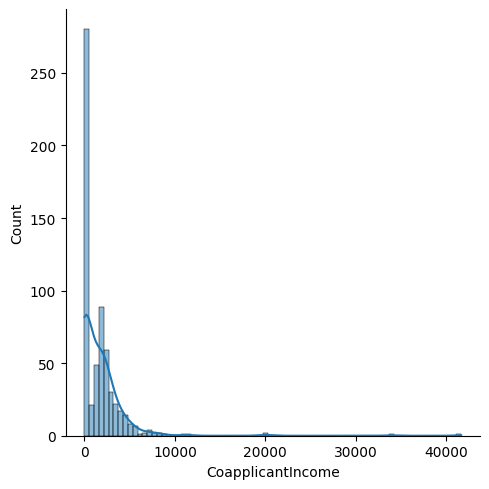

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df["CoapplicantIncome"], kde=True)  # kde=True adds the density curve
plt.show()

In [15]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

In [16]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)

In [17]:
min_r,max_r

(np.float64(-3445.875), np.float64(5743.125))

In [19]:
df = df[df["CoapplicantIncome"]<=max_r]

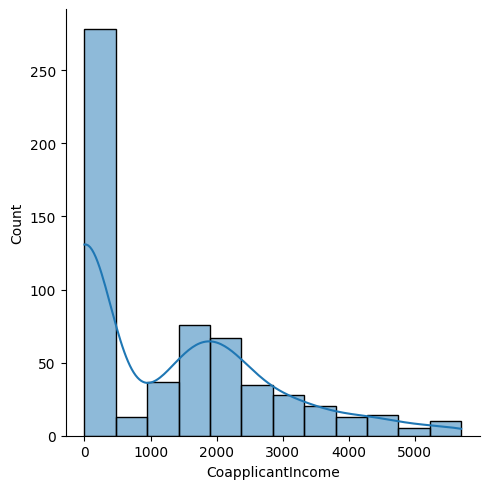

In [20]:
sns.displot(df["CoapplicantIncome"], kde=True)  # kde=True adds the density curve
plt.show()

In [21]:
from sklearn.preprocessing import FunctionTransformer

In [23]:
ft = FunctionTransformer(func=np.log1p)
ft.fit(df["CoapplicantIncome"])

FunctionTransformer(func=<ufunc 'log1p'>)

In [25]:
df["CoapplicantIncome_tf"]=ft.transform(df[["CoapplicantIncome"]])

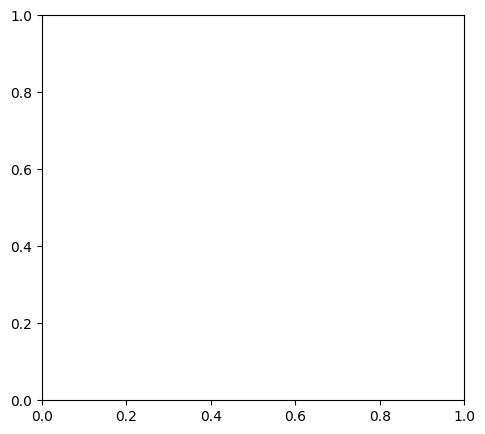

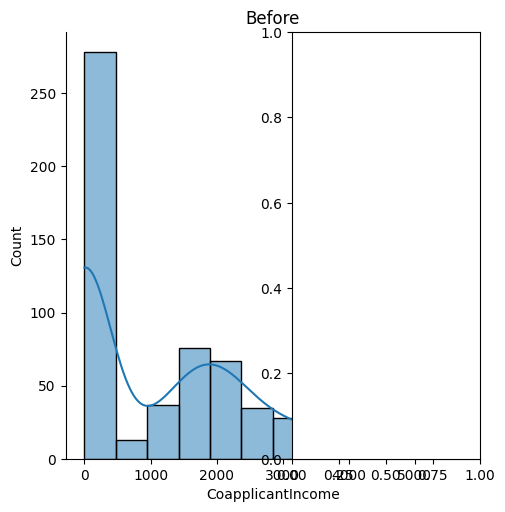

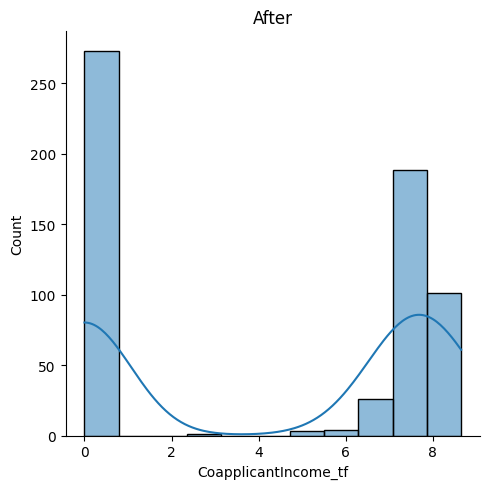

In [31]:
plt.figure(figsize=(12, 5))  # Set figure size

plt.subplot(1,2,1)
sns.displot(df["CoapplicantIncome"], kde=True)
plt.title("Before")


plt.subplot(1,2,2)
sns.displot(df["CoapplicantIncome_tf"], kde=True)   # kde=True adds the density curve
plt.title("After")
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

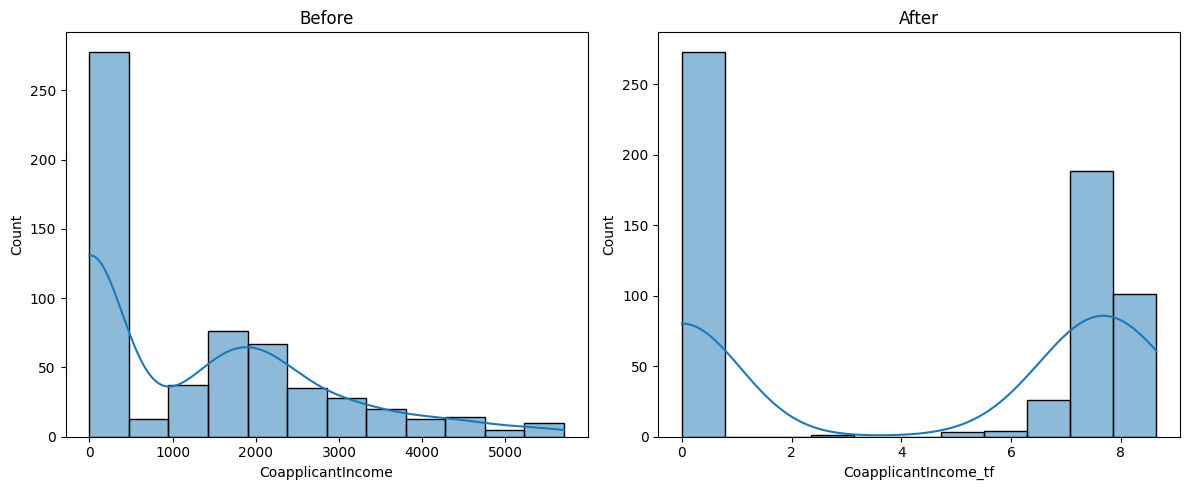

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))  # Set figure size

# First subplot
plt.subplot(1, 2, 1)
sns.histplot(df["CoapplicantIncome"], kde=True)  # Use histplot instead of displot
plt.title("Before")

# Second subplot
plt.subplot(1, 2, 2)
sns.histplot(df["CoapplicantIncome_tf"], kde=True)  # Ensure this column exists
plt.title("After")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()